In [1]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ericp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# df = pd.read_csv('twcs.csv') 

In [3]:
# df

In [4]:
# df['cleaned_text'] = df['text'].str.lower()

In [5]:
# url_pattern = re.compile(r'https?://\S+|www\.\S+')
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: url_pattern.sub(r'', x))

In [6]:
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: BeautifulSoup(x, "lxml").text)

In [7]:
# emoji_pattern = re.compile("[" 
#                             u"\U0001F600-\U0001F64F"  
#                             u"\U0001F300-\U0001F5FF"  
#                             u"\U0001F680-\U0001F6FF"  
#                             u"\U0001F1E0-\U0001F1FF"  
#                             u"\U00002702-\U000027B0"
#                             u"\U000024C2-\U0001F251"
#                             "]+", flags=re.UNICODE)
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: emoji_pattern.sub(r'', x))

In [8]:
# stop_words = set(stopwords.words('english'))
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: " ".join([word for word in word_tokenize(x) if word not in stop_words]))

In [9]:
# lemmatizer = WordNetLemmatizer()
# df['cleaned_text'] = df['cleaned_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word, pos='v') if wordnet.synsets(word) else word for word in word_tokenize(x)]))

In [10]:
# df[['text', 'cleaned_text']]

In [11]:
# df.to_csv('twcs_cleaned.csv', index=False)

In [12]:
# df

In [13]:
# df = pd.read_csv('twcs_cleaned.csv')

In [14]:
# df

In [15]:
# tqdm.pandas()

company_author_ids = {
    'AppleSupport': 'Apple',
    'AmazonHelp': 'Amazon',
    'Uber_Support': 'Uber',
    'Delta': 'Delta',
    'SpotifyCares': 'Spotify',
    'Tesco': 'Tesco',
    'AmericanAir': 'American Airlines',
    'comcastcares': 'Comcast',
    'TMobileHelp': 'T-Mobile',
    'British_Airways': 'British Airways',
    'SouthwestAir': 'Southwest Airlines',
    'Ask_Spectrum': 'Spectrum',
    'hulu_support': 'Hulu',
    'ChipotleTweets': 'Chipotle',
    'sprintcare': 'Sprint',
    'VirginTrains': 'Virgin Trains',
    'AskPlayStation': 'PlayStation',
    'XboxSupport': 'Xbox',
    'UPSHelp': 'UPS',
    'sainsburys': 'Sainsbury’s'
}

# def assign_company_name(row, company_author_ids):
#     if row['inbound']:
#         if not pd.isna(row['in_response_to_tweet_id']):
#             response_tweet = df[df['tweet_id'] == row['in_response_to_tweet_id']]
#             if not response_tweet.empty:
#                 response_author = response_tweet.iloc[0]['author_id']
#                 if response_author in company_author_ids:
#                     return company_author_ids[response_author]
#         for company in company_author_ids.keys():
#             if f"@{company.lower()}" in row['text'].lower():
#                 return company_author_ids[company]
#     return None

# df['company_name'] = df.progress_apply(assign_company_name, axis=1, company_author_ids=company_author_ids)

In [16]:
df = pd.read_csv('twcs_with_company.csv')

In [17]:
df_customer_tweets = df[df['inbound'] == True]

In [18]:
warnings.filterwarnings("ignore")
df_customer_tweets.drop(columns=['tweet_id','author_id','inbound','created_at','in_response_to_tweet_id','text'	,'response_tweet_id'], inplace=True)

In [19]:
company_groups = df_customer_tweets.groupby('company_name')

In [20]:
apple_tweets = company_groups.get_group('Apple')
amazon_tweets = company_groups.get_group('Amazon')
uber_tweets = company_groups.get_group('Uber')
delta_tweets = company_groups.get_group('Delta')
spotify_tweets = company_groups.get_group('Spotify')
tesco_tweets = company_groups.get_group('Tesco')
americanair_tweets = company_groups.get_group('American Airlines')
comcast_tweets = company_groups.get_group('Comcast')
tmobile_tweets = company_groups.get_group('T-Mobile')
british_airways_tweets = company_groups.get_group('British Airways')
southwest_tweets = company_groups.get_group('Southwest Airlines')
spectrum_tweets = company_groups.get_group('Spectrum')
hulu_tweets = company_groups.get_group('Hulu')
chipotle_tweets = company_groups.get_group('Chipotle')
sprint_tweets = company_groups.get_group('Sprint')
virgin_trains_tweets = company_groups.get_group('Virgin Trains')
playstation_tweets = company_groups.get_group('PlayStation')
xbox_tweets = company_groups.get_group('Xbox')
ups_tweets = company_groups.get_group('UPS')
sainsburys_tweets = company_groups.get_group('Sainsbury’s')

In [21]:
company_tweet_dataframes = [
    apple_tweets,
    amazon_tweets,
    uber_tweets,
    delta_tweets,
    spotify_tweets,
    tesco_tweets,
    americanair_tweets,
    comcast_tweets,
    tmobile_tweets,
    british_airways_tweets,
    southwest_tweets,
    spectrum_tweets,
    hulu_tweets,
    chipotle_tweets,
    sprint_tweets,
    virgin_trains_tweets,
    playstation_tweets,
    xbox_tweets,
    ups_tweets,
    sainsburys_tweets,
]

In [22]:
warnings.filterwarnings("ignore")

for df in company_tweet_dataframes:
    if 'company_name' in df.columns:
        df.drop(columns=['company_name'], inplace=True)
    
    author_ids_to_remove = list(company_author_ids.keys())
    
    tqdm.pandas(desc="Cleaning Text")
    df['cleaned_text'] = df['cleaned_text'].progress_apply(lambda text: " ".join(
        word for word in text.split()
        if re.sub(r'[^a-zA-Z\s]', '', word) and 
           re.sub(r'[^a-zA-Z\s]', '', word).lower() not in [str(author).lower() for author in author_ids_to_remove]
    ))

Cleaning Text: 100%|██████████| 21579/21579 [00:00<00:00, 23655.92it/s]


Analyzing Sentiments:   0%|          | 0/20 [00:00<?, ?it/s]

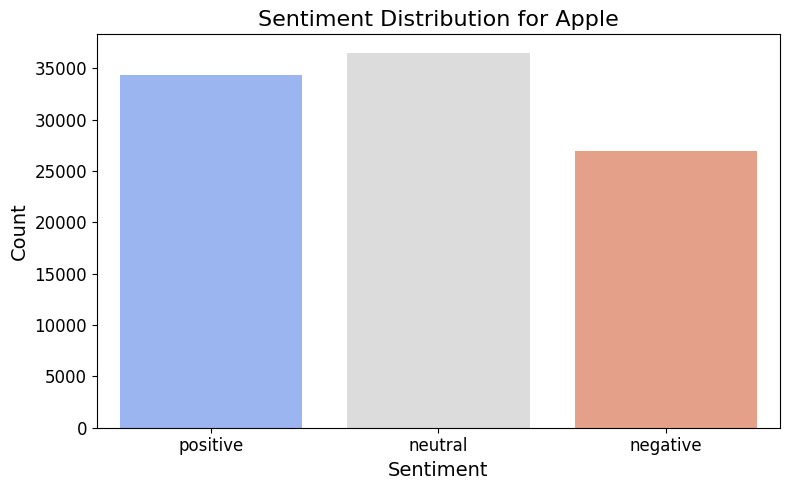

Analyzing Sentiments:   5%|▌         | 1/20 [00:09<02:51,  9.02s/it]

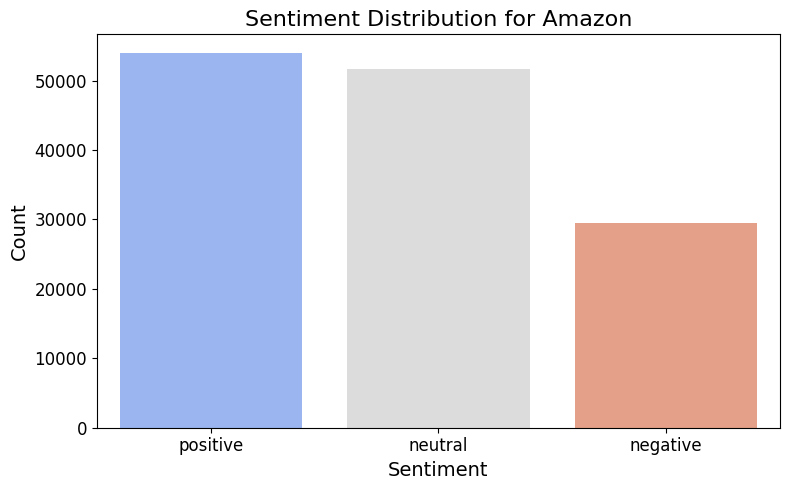

Analyzing Sentiments:  10%|█         | 2/20 [00:22<03:33, 11.84s/it]

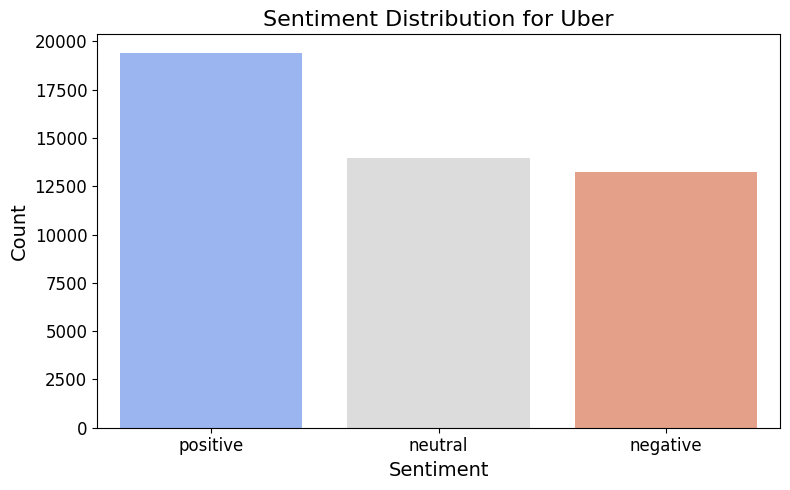

Analyzing Sentiments:  15%|█▌        | 3/20 [00:28<02:30,  8.83s/it]

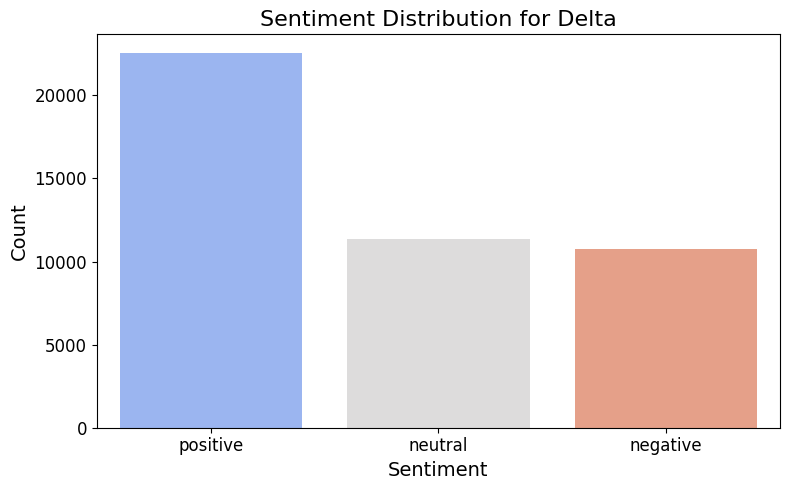

Analyzing Sentiments:  20%|██        | 4/20 [00:33<01:57,  7.34s/it]

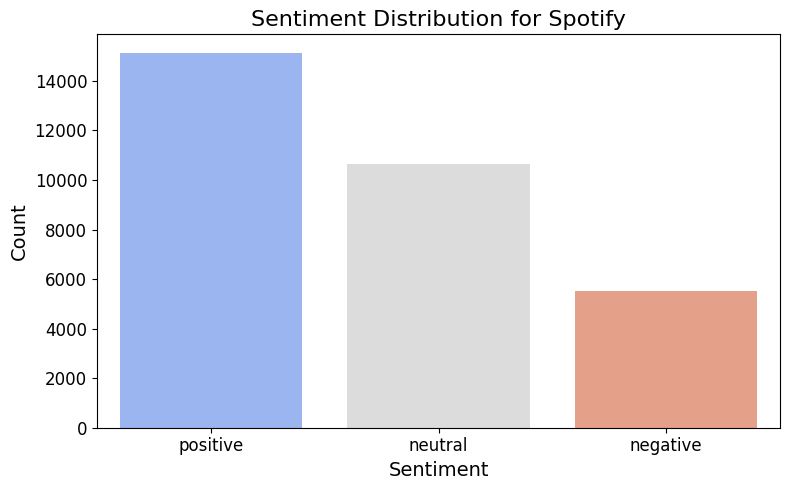

Analyzing Sentiments:  25%|██▌       | 5/20 [00:36<01:28,  5.88s/it]

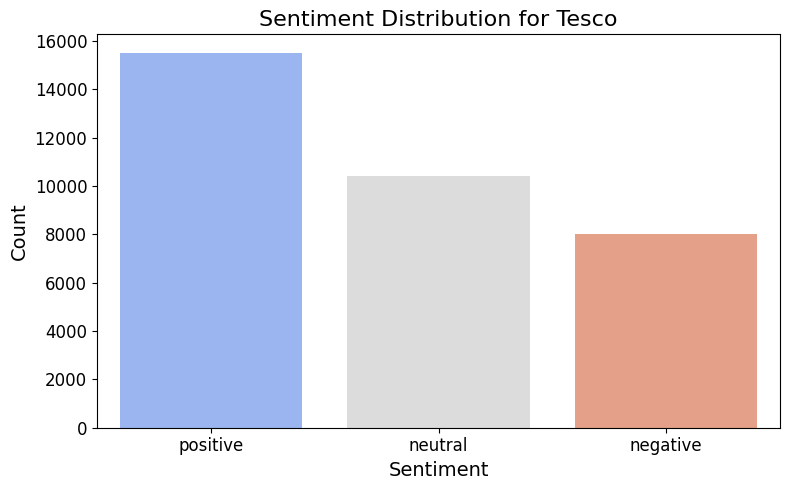

Analyzing Sentiments:  30%|███       | 6/20 [00:40<01:12,  5.20s/it]

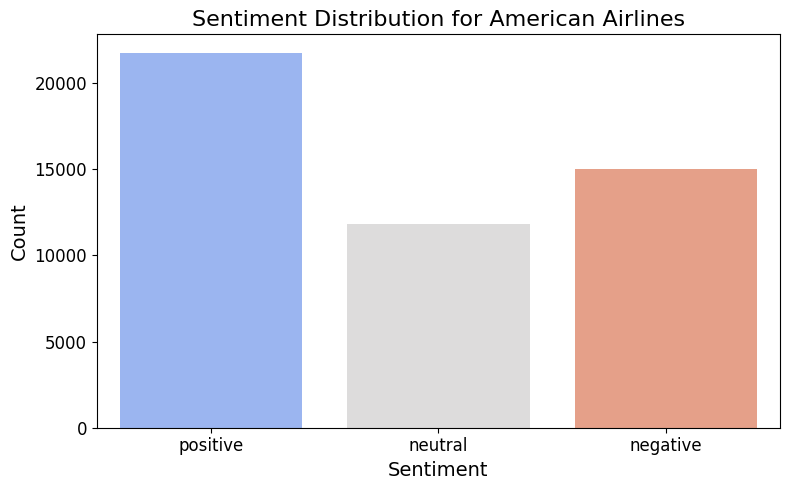

Analyzing Sentiments:  35%|███▌      | 7/20 [00:45<01:08,  5.27s/it]

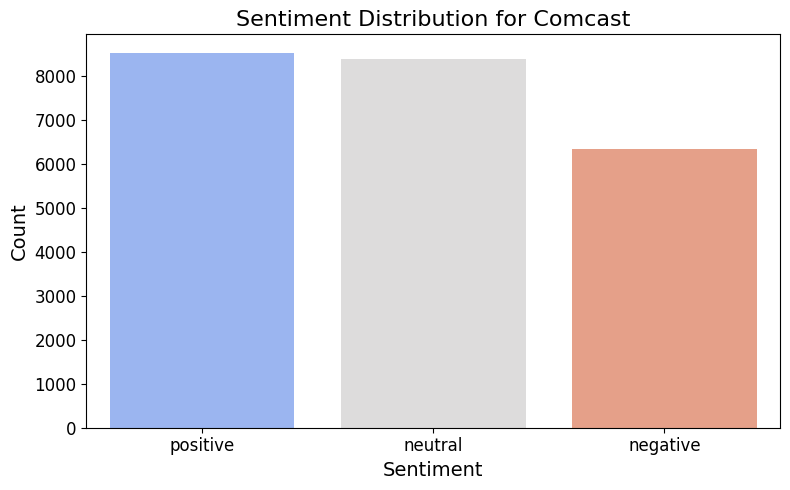

Analyzing Sentiments:  40%|████      | 8/20 [00:49<00:57,  4.79s/it]

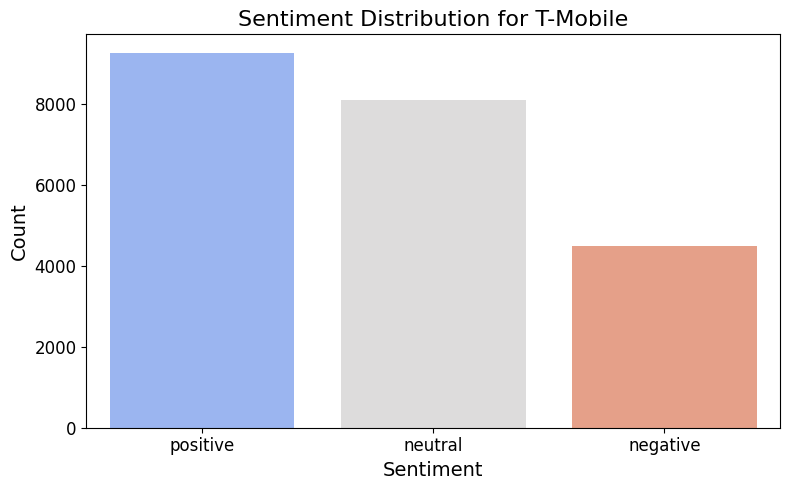

Analyzing Sentiments:  45%|████▌     | 9/20 [00:52<00:47,  4.35s/it]

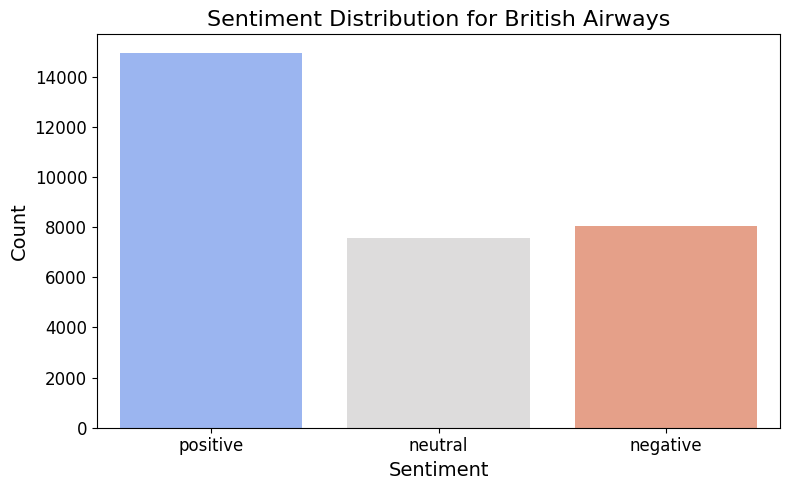

Analyzing Sentiments:  50%|█████     | 10/20 [00:57<00:45,  4.53s/it]

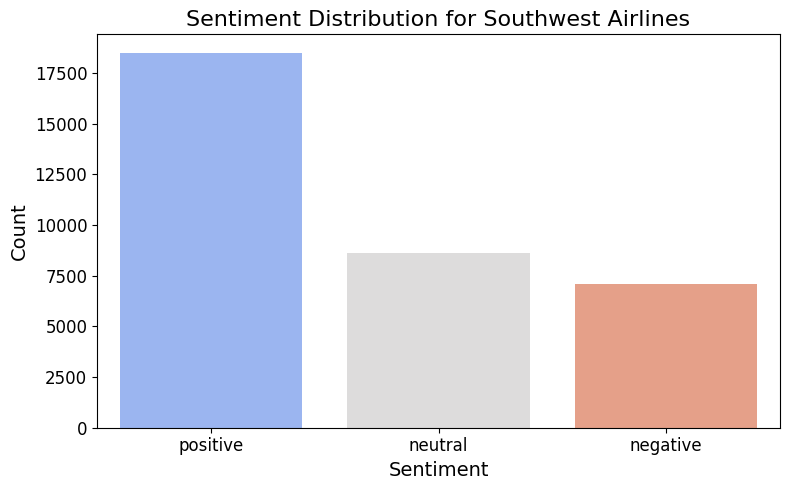

Analyzing Sentiments:  55%|█████▌    | 11/20 [01:02<00:40,  4.49s/it]

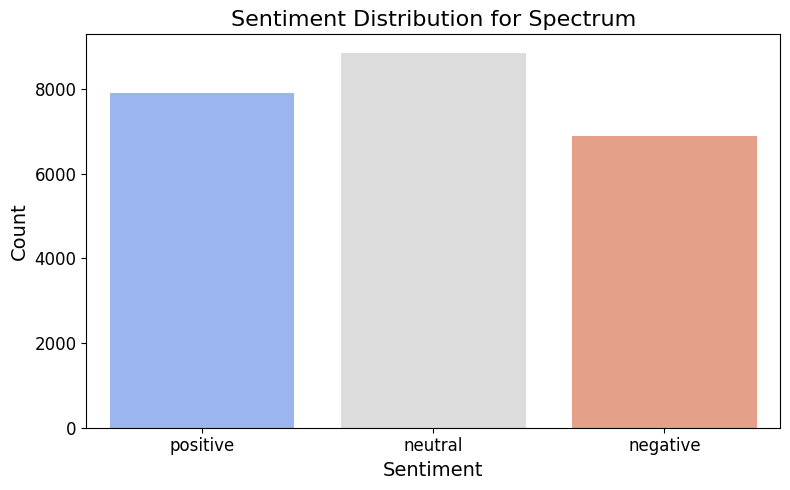

Analyzing Sentiments:  60%|██████    | 12/20 [01:05<00:32,  4.11s/it]

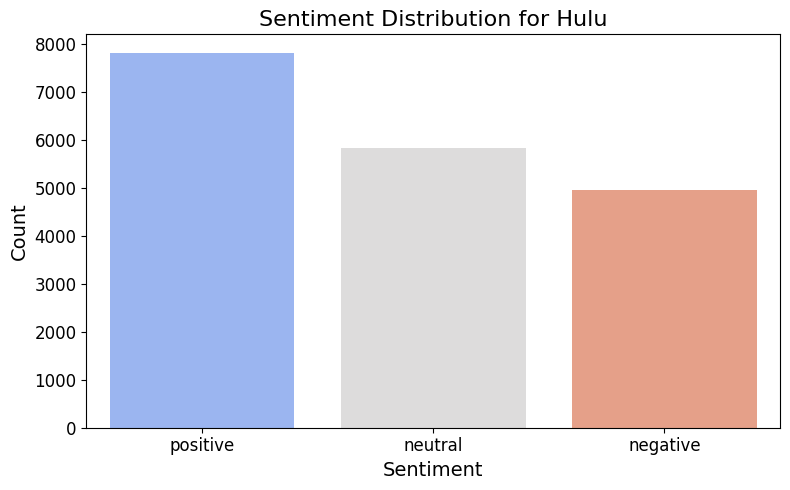

Analyzing Sentiments:  65%|██████▌   | 13/20 [01:07<00:25,  3.63s/it]

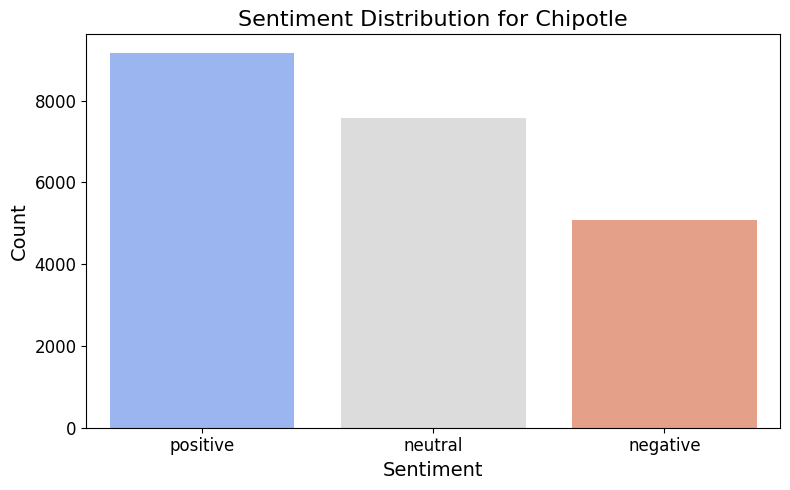

Analyzing Sentiments:  70%|███████   | 14/20 [01:10<00:18,  3.15s/it]

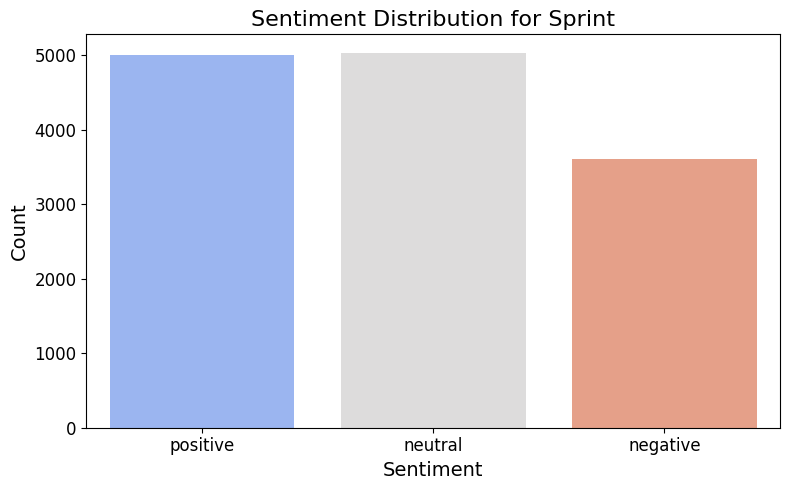

Analyzing Sentiments:  75%|███████▌  | 15/20 [01:12<00:14,  2.92s/it]

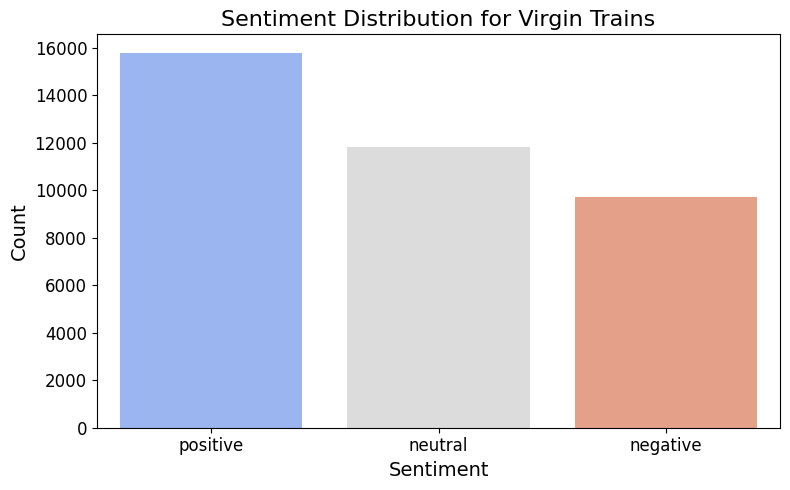

Analyzing Sentiments:  80%|████████  | 16/20 [01:16<00:12,  3.17s/it]

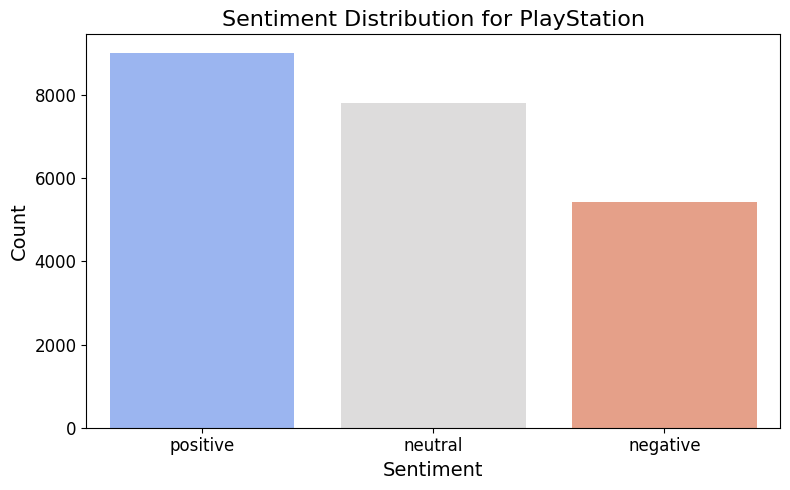

Analyzing Sentiments:  85%|████████▌ | 17/20 [01:18<00:08,  2.90s/it]

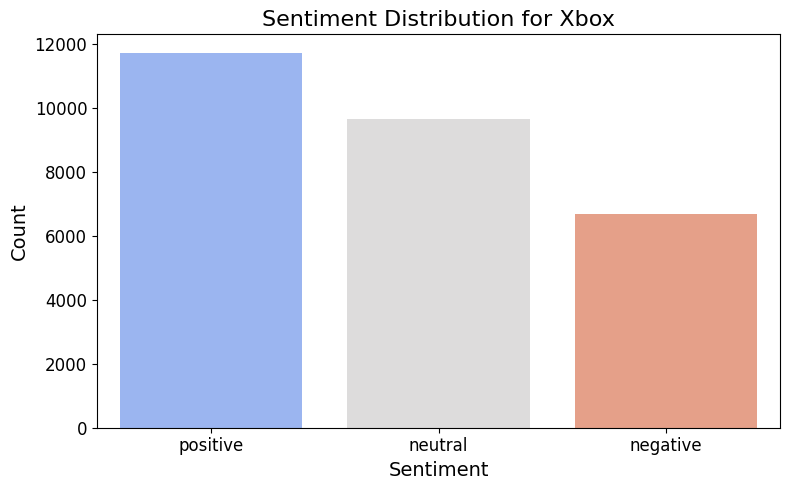

Analyzing Sentiments:  90%|█████████ | 18/20 [01:21<00:05,  2.93s/it]

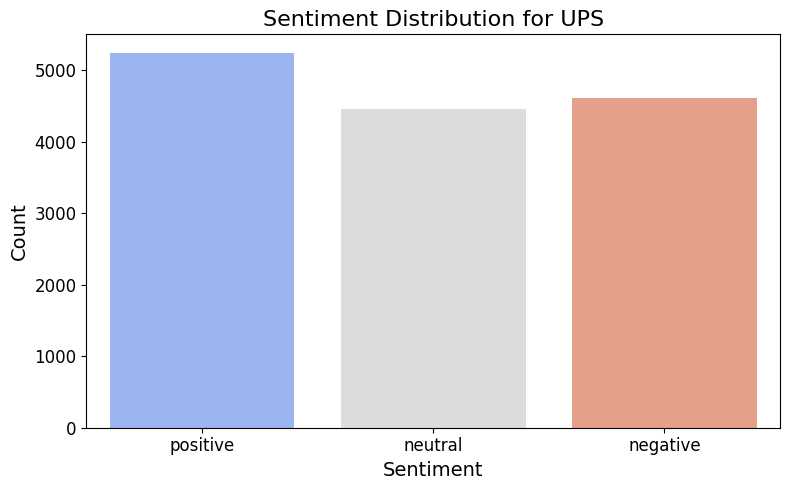

Analyzing Sentiments:  95%|█████████▌| 19/20 [01:23<00:02,  2.58s/it]

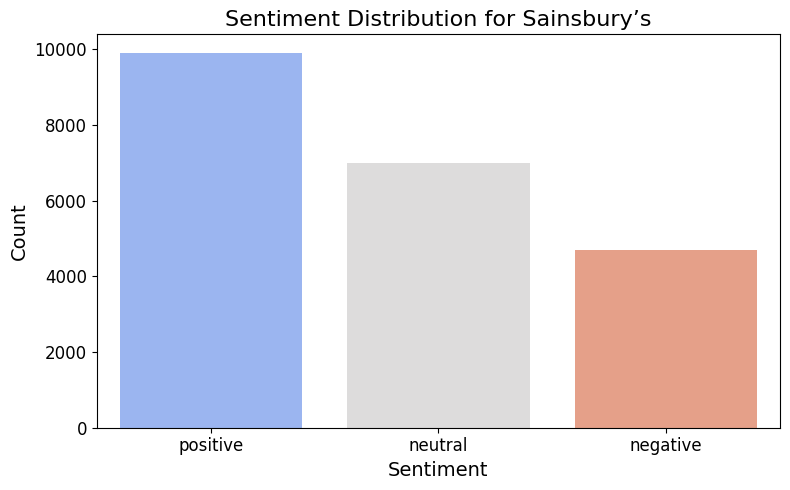

Analyzing Sentiments: 100%|██████████| 20/20 [01:25<00:00,  4.27s/it]


In [23]:
warnings.filterwarnings("ignore")

sia = SentimentIntensityAnalyzer()

sentiment_results = {}

company_names = [
    'Apple', 'Amazon', 'Uber', 'Delta', 'Spotify', 'Tesco', 'American Airlines', 
    'Comcast', 'T-Mobile', 'British Airways', 'Southwest Airlines', 'Spectrum', 
    'Hulu', 'Chipotle', 'Sprint', 'Virgin Trains', 'PlayStation', 'Xbox', 'UPS', 
    'Sainsbury’s'
]

for i, (df, company_name) in tqdm(enumerate(zip(company_tweet_dataframes, company_names)), 
                                  total=len(company_tweet_dataframes), 
                                  desc="Analyzing Sentiments"):
    df['sentiment_scores'] = df['cleaned_text'].apply(sia.polarity_scores)
    df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
    df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
    df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
    df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

    df['sentiment_label'] = df['compound'].apply(lambda x: 'positive' if x > 0.05 
                                                 else ('negative' if x < -0.05 
                                                       else 'neutral'))
    sentiment_results[company_name] = df[['cleaned_text', 'neg', 'neu', 'pos', 'compound', 'sentiment_label']]
    company_tweet_dataframes[i] = df

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='coolwarm')
    plt.title(f"Sentiment Distribution for {company_name}", fontsize=16)
    plt.xlabel("Sentiment", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import LdaModel
from gensim.corpora import Dictionary

warnings.filterwarnings("ignore")

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
lda_sklearn = LatentDirichletAllocation(n_components=5, random_state=42)

lda_models = {}
tfidf_matrices = {}
gensim_data = {}

for i, (df, company_name) in tqdm(enumerate(zip(company_tweet_dataframes, company_names)), 
                                  total=len(company_tweet_dataframes), 
                                  desc="Fitting LDA models"):
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
    lda_sklearn.fit(tfidf_matrix)
    
    texts = [text.split() for text in df['cleaned_text']]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    lda_gensim = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)
    
    lda_models[company_name] = lda_gensim
    gensim_data[company_name] = (corpus, dictionary)

Fitting LDA models: 100%|██████████| 20/20 [21:17<00:00, 63.85s/it]  


In [25]:
company_name = list(gensim_data.keys())[0]  
corpus, dictionary = gensim_data[company_name]
lda_gensim = lda_models[company_name]

panel = gensimvis.prepare(lda_gensim, corpus, dictionary)
print(f"Interactive LDA visualization for {company_name}:")
pyLDAvis.display(panel)

Interactive LDA visualization for Apple:


In [46]:
apple_tweets

,cleaned_text,sentiment_scores,neg,neu,pos,compound,sentiment_label
397,newest update make sure download yesterday,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...",0.000,0.685,0.315,0.3182,positive
399,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,neutral
400,change show correctly social media platforms,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
402,try reset settings restart phone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
404,look like,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.000,0.286,0.714,0.3612,positive
...,...,...,...,...,...,...,...
2811311,update slack everything seem work well thank '...,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...",0.000,0.685,0.315,0.5574,positive
2811420,hey able duplicate file page search really ann...,"{'neg': 0.285, 'neu': 0.715, 'pos': 0.0, 'comp...",0.285,0.715,0.000,-0.4927,negative
2811422,yo weird glitch w/ capital attempt make tweet ...,"{'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'comp...",0.175,0.825,0.000,-0.1779,negative
2811484,fuck phone keep hang call show call failure,"{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'comp...",0.531,0.469,0.000,-0.7783,negative


In [49]:
company_name = 'Apple'
lda_model = lda_models[company_name]

num_words = 10
print(f"Topics for {company_name}:")
for idx, topic in lda_model.show_topics(num_topics=5, num_words=num_words, formatted=False):
    words = ", ".join([word for word, prob in topic])
    print(f"Topic {idx}: {words}")

Topics for Apple:
Topic 0: thank, get, help, apple, send, issue, please, fix, work, need
Topic 1: apple, n't, iphone, get, try, yes, say, app, use, icloud
Topic 2: time, phone, work, screen, happen, go, restart, turn, iphone, every
Topic 3: music, play, app, iphone, de, sound, ios, notification, se, que
Topic 4: update, ios, iphone, phone, fix, battery, since, new, issue, please


In [50]:
topic_names = {
    0: "Customer Support Issues",
    1: "Device Features and Apps",
    2: "Phone Performance Problems",
    3: "Media and Notifications",
    4: "Software Updates and Battery"
}

corpus, dictionary = gensim_data['Apple']
apple_tweets['topic_id'] = [
    max(lda_models['Apple'].get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus
]

apple_tweets['topic_name'] = apple_tweets['topic_id'].map(topic_names)

print(apple_tweets[['cleaned_text', 'sentiment_label', 'topic_name']].head())

                                     cleaned_text sentiment_label  \
397    newest update make sure download yesterday        positive   
399                                                       neutral   
400  change show correctly social media platforms         neutral   
402              try reset settings restart phone         neutral   
404                                     look like        positive   

                       topic_name  
397  Software Updates and Battery  
399       Customer Support Issues  
400    Phone Performance Problems  
402    Phone Performance Problems  
404    Phone Performance Problems  


In [51]:
sentiment_topic_analysis = apple_tweets.groupby('topic_name')['sentiment_label'].value_counts(normalize=True).unstack()
print(sentiment_topic_analysis)

sentiment_label               negative   neutral  positive
topic_name                                                
Customer Support Issues       0.185301  0.366360  0.448339
Device Features and Apps      0.231883  0.387288  0.380829
Media and Notifications       0.130117  0.656119  0.213764
Phone Performance Problems    0.280570  0.378331  0.341099
Software Updates and Battery  0.393366  0.322931  0.283703


In [ ]:
#Software updates and battery issues have the highest negative sentiment (39.34%), requiring immediate attention.
#Customer support has a significant positive sentiment (44.83%), showing effective handling but room for improvement.